# Code Description

This Python code simulates the 3D motion of charged particles in the presence of a magnetic dipole at the origin. This is done using a system of coupled differential equations in terms of dimensionless coordinates and time. The equations of motion are given by:

\begin{align*}
(X^2 + Y^2 + Z^2)^{5/2}\ddot{X} + (X^2 + Y^2 -2Z^2)\dot{Y} + 3YZ\dot{Z} &= 0 \\
(X^2 + Y^2 + Z^2)^{5/2}\ddot{Y} - (X^2 + Y^2 -2Z^2)\dot{X} - 3XZ\dot{Z} &= 0 \\
(X^2 + Y^2 + Z^2)^{5/2}\ddot{Z} + 3Z(X\dot{Y} - Y\dot{X}) &= 0
\end{align*}

where $X(\tau), Y(\tau), Z(\tau),$ and $\tau$ are defined as $X = \frac{x}{r_0}, \quad Y = \frac{y}{r_0}, \quad Z = \frac{z}{r_0}, \quad \tau = \omega t$ with  $\omega = \frac{qB_0}{M}$ and $B_0 = \frac{\mu_0 m_0}{4\pi r_0^3}$. $B_0$ is the magnetic field in the equatorial plane of the dipole at a distance $r_0$ from the origin.

The system is defined by the function `differential_eqs`. The positions and velocities of the particles are integrated over time using the `odeint` solver from the `scipy` library. However, the `odeint` solver requires the system of differential equations to be in the form $\dot{y} = f(y, t)$, where $y$ is a vector of the dependent variables and $t$ is the independent variable. Therefore, the above equations are converted into the following system of first-order differential equations:

\begin{align*}
\dot{X} &= a_1 \\
\dot{Y} &= a_2 \\
\dot{Z} &= a_3 \\
\dot{a}_1 &= -\frac{(X^2 + Y^2 - 2Z^2)a_2 + 3YZa_3}{(X^2 + Y^2 + Z^2)^{5/2}} \\
\dot{a}_2 &= \frac{(X^2 + Y^2 - 2Z^2)a_1 + 3XZa_3}{(X^2 + Y^2 + Z^2)^{5/2}} \\
\dot{a}_3 &= -\frac{3Z(Xa_2 - Ya_1)}{(X^2 + Y^2 + Z^2)^{5/2}}
\end{align*}

The number of particles and their initial positions are specified by user input. The code then computes and visualizes the motion of the particles over time. The plots show the X, Y, and Z coordinates of each particle as well as the trajectories of the particles in 3D space. 

It is important to note that the code does not consider the interactions between the charged particles, only their interactions with the magnetic dipole. This behavior becomes very chaotic the farther from the dipole you start. 

When using this code, it is recommended to keep the overall magnitude of the starting position under 5, as anything more exits the influence of the dipole and flies away. Also, and starting position that is only at the poles (i.e. [0,0,z]) will lead to the particle flying away as well. 


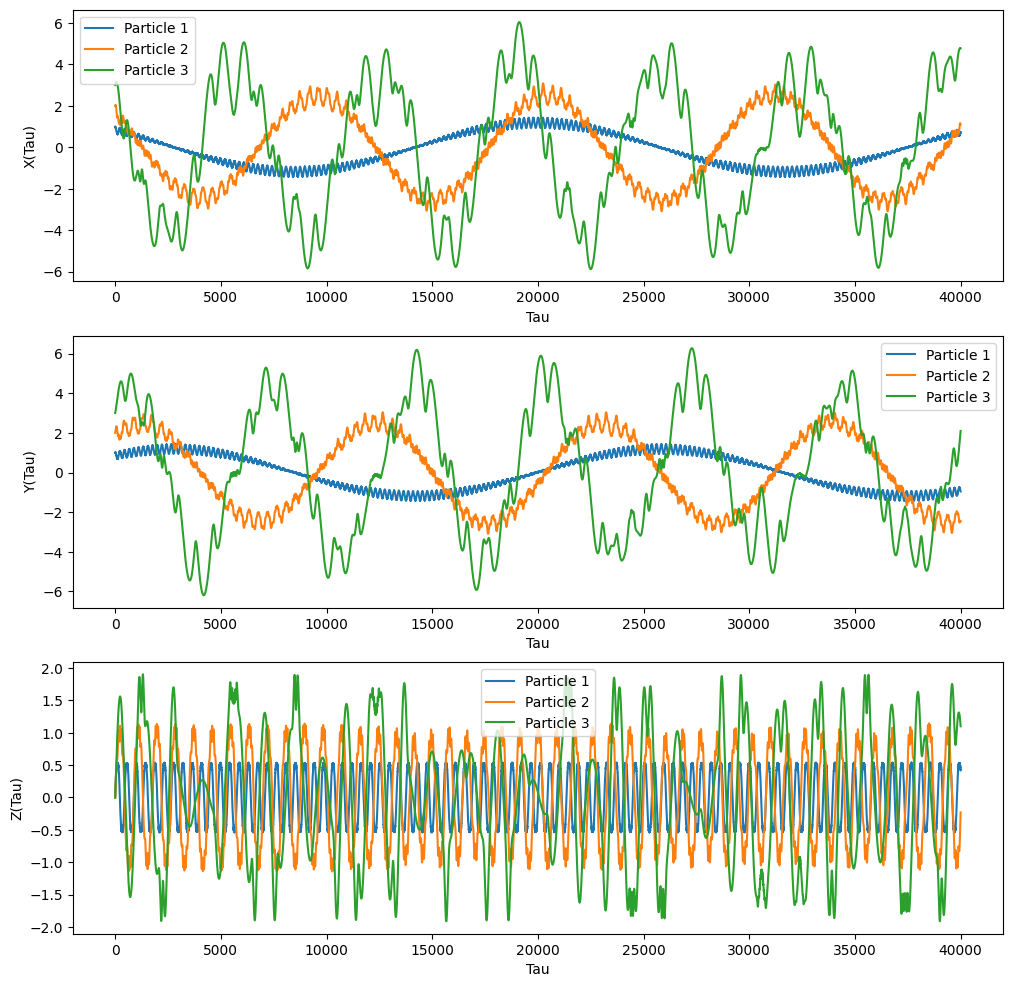

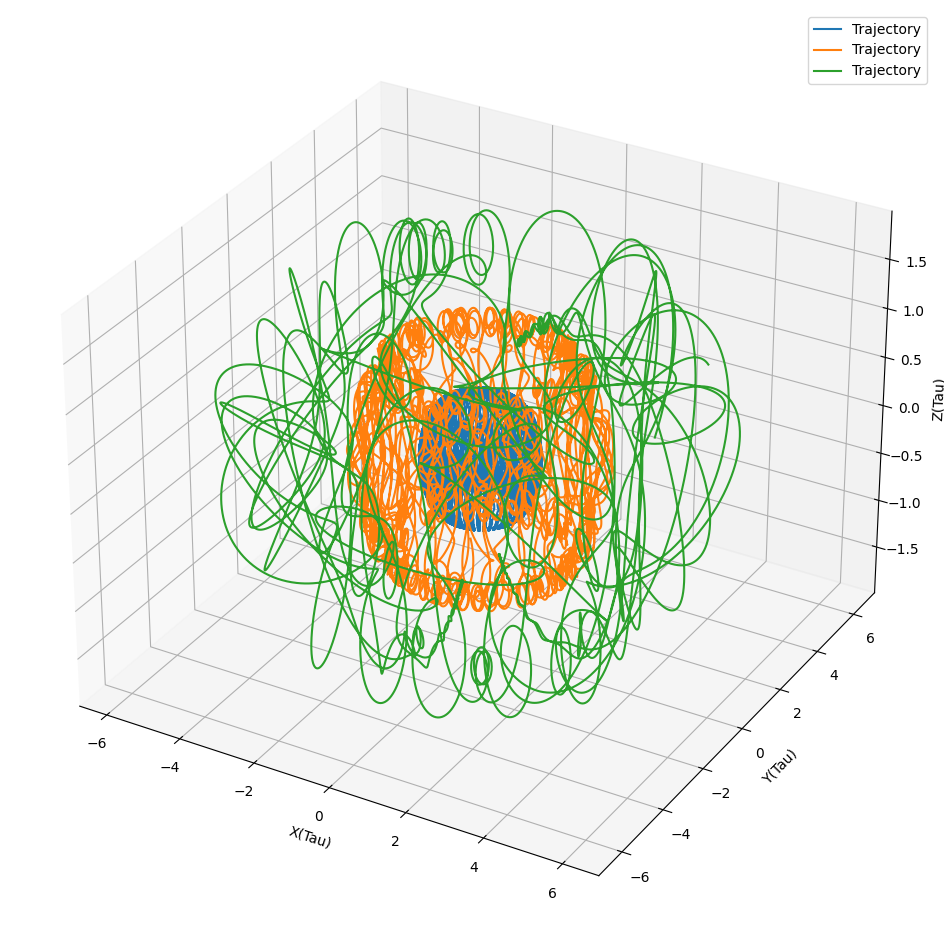

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of coupled differential equations for particle motion
def differential_eqs(y, tau, n):
    equations = []

    # Loop over each particle
    for i in range(1, n+1):
        index_offset = 6 * (i - 1)
        X, a1, Y, a2, Z, a3 = [y[round(j)] for j in range(index_offset, index_offset + 6)]

        # Equations of motion for each coordinate
        Xdot = a1
        Ydot = a2
        Zdot = a3
        a1dot = -((X**2 + Y**2 - 2*Z**2)*a2 + 3*Y*Z*a3) / (X**2 + Y**2 + Z**2)**(5/2)
        a2dot = ((X**2 + Y**2 - 2*Z**2)*a1 + 3*X*Z*a3) / (X**2 + Y**2 + Z**2)**(5/2)
        a3dot = -(3*Z*(X*a2 - Y*a1)) / (X**2 + Y**2 + Z**2)**(5/2)

        equations.extend([Xdot, a1dot, Ydot, a2dot, Zdot, a3dot])

    return equations

# Function to plot X, Y, and Z coordinates over time
def plot_coordinates(ax, tau, data, labels):
    ax.set_xlabel(labels['x'])
    ax.set_ylabel(labels['y'])
    for i, particle_data in enumerate(data):
        ax.plot(tau, particle_data, label=f'Particle {i + 1}')
    ax.legend()

# Function to plot 3D trajectories of particles
def plot_3d_trajectories(ax, X, Y, Z, labels):
    ax.set_xlabel(labels['x'])
    ax.set_ylabel(labels['y'])
    ax.set_zlabel(labels['z'])
    ax.plot(X, Y, Z, label='Trajectory')

# Dimensionless time array
tau = np.linspace(0, 40000, 20000)

# User input for the number of particles and initial positions
n = int(input("Enter the number of particles: "))
initial_positions = []
for i in range(1, n+1):
    x = float(input(f"Enter the initial x-position for Particle {i}: "))
    y = float(input(f"Enter the initial y-position for Particle {i}: "))
    z = float(input(f"Enter the initial z-position for Particle {i}: "))
    initial_positions.extend([x, 0.005, y, 0.005, z, 0.01])

# Solving coupled differential equations using odeint
solution = odeint(differential_eqs, initial_positions, tau, args=(n,))

# Extracting position functions for all particles
data = [solution[:, 6*i:6*(i+1)] for i in range(n)]
X, Y, Z = [particle[:, 0] for particle in data], [particle[:, 2] for particle in data], [particle[:, 4] for particle in data]

# Plotting X, Y, and Z coordinates for all particles
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

plot_coordinates(axs[0], tau, X, {'x': 'Tau', 'y': 'X(Tau)'})
plot_coordinates(axs[1], tau, Y, {'x': 'Tau', 'y': 'Y(Tau)'})
plot_coordinates(axs[2], tau, Z, {'x': 'Tau', 'y': 'Z(Tau)'})

plt.show()

# Plotting 3D trajectories of particles
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X(Tau)')
ax.set_ylabel('Y(Tau)')
ax.set_zlabel('Z(Tau)')
for i in range(n):
    plot_3d_trajectories(ax, X[i], Y[i], Z[i], {'x': 'X(Tau)', 'y': 'Y(Tau)', 'z': 'Z(Tau)'})
plt.legend()

plt.show()
